# MiniEP3 - Aproximação de Integrais usando Médias e Amostragem Uniforme, com a biblioteca *pthreads*

## Entrega do miniEP3

Preencha o nome dos 5 membros do seu grupo na tabela abaixo:

| Nome | NUSP |
|------|------|
| Ariel Serranoni Soares da Silva| 7658024 |


**Apenas um dos membros** deverá entregar um **arquivo .tar**, até o dia **29 de Abril**, com:

1. **Este arquivo** `.ipynb`, com as soluções do miniEP3 **feitas pelo grupo**

    - Os gráficos e análises devem poder ser produzidos


2. O **código C escrito** (arquivo `monte_carlo.c`)

    - Deve compilar e executar **sem erros**



3. Os arquivos `Makefile`, e `Project.toml`
4. Um **arquivo .csv** com os resultados das medições feitas neste miniEP

    - Entregue os dados de cada repetição, sem processamento (não calcule a média e CI)

## Configuração do Ambiente

Como no miniEP1&2, a primeira tarefa é instalar e configurar o ambiente.

### Compilador C

Neste miniEP também vamos usar a linguagem C e a biblioteca *pthreads*. Vocês vão precisar de acesso a um sistema Linux com o compilador GCC e a biblioteca *pthreads*. Caso não consiga instalar o GCC ou tenha dificuldades para acessar um sistema Linux, entre em contato pelo fórum do *Edisciplinas*.

### Julia, Jupyter, IJulia

Pule essa etapa se já configurou o ambiente Julia no miniEP1&2.
Para fazer o miniEP, vocês vão precisar:

- [Instalar o Jupyter Notebook](https://jupyter.readthedocs.io/en/latest/install.html)
- Instalar Julia 1.3:
    - [Baixando o binário](https://julialang.org/downloads/)
    - **ou** [usando seu gerenciador de pacotes](https://julialang.org/downloads/platform/)
- Instalar o pacote *IJulia*:
    - Inicie o interpretador Julia
    - Digite `] add IJulia` e pressione `<ENTER>`

Depois disso, vocês vão conseguir iniciar o arquivo `.ipynb` do miniEP.

### Pacotes Julia para o miniEP

Os pacotes necessários para o miniEP estão listados no arquivo `Project.toml`, mas vocês podem instalar e atualizar os pacotes rodando a célula abaixo:

In [78]:
] up

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %                     ]  47.0 %Fetching: [===========================>             ]  65.5 %>  ]  94.2 %

  Installed ArrayInterface ─ v2.8.7
  Installed GeometryTypes ── v0.8.3
   Updating `/mnt/c/Users/Ariel/Desktop/miniEP3/Project.toml`
 [no changes]
   Updating `/mnt/c/Users/Ariel/Desktop/miniEP3/Manifest.toml`
  [4fba245c] ↑ ArrayInterface v2.8.6 ⇒ v2.8.7
  [4d00f742] ↑ GeometryTypes v0.8.2 ⇒ v0.8.3


Verifique o status dos pacotes, e se há algum problema, com o comando:

In [2]:
] st

Status `/mnt/c/Users/Ariel/Desktop/miniEP3/Project.toml`
  [336ed68f] CSV v0.6.1
  [a93c6f00] DataFrames v0.20.2
  [31c24e10] Distributions v0.23.2
  [7073ff75] IJulia v1.21.2
  [8314cec4] PGFPlotsX v1.2.6
  [1a8c2f83] Query v0.12.2
  [f3b207a7] StatsPlots v0.14.5


## Integração por Método de Monte Carlo

O objetivo deste miniEP é promover o estudo de programação paralela usando a biblioteca *pthreads*. Vamos utilizar uma versão sequencial em C do código em Julia do miniEP1&2. A tarefa deste miniEP será completar a implementação em C, escrever um programa paralelo usando a biblioteca *pthreads*, e analisar o desempenho do programa escrito com diferentes números de threads.

Lembrando o que vimos no miniEP1&2, a intuição por trás do método de Monte Carlo é que a integral de uma função $f$ pode ser estimada pela média do valor de $f$ num conjunto suficientemente grande de pontos obtidos a partir de uma distribuição uniforme. Mais formalmente, para um conjunto de pontos $x_1,\dots,x_N$ uniformemente amostrados num intervalo $[a,b]$, a integral de $f$ no intervalo $[a,b]$ pode ser aproximada por:

$$
\int_{a}^{b} f(x)dx \approx \mathbb{E}\left[\left(b - a\right)\dfrac{1}{N}\sum\limits_{i = 1}^{N}{f(x_i)}\right]
$$

Para uma representação gráfica da intuição, e para a prova dessa aproximação, veja [esta página](https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-in-practice/monte-carlo-integration).

A Integração por Método de Monte Carlo é um problema [embaraçosamente paralelo](https://en.wikipedia.org/wiki/Embarrassingly_parallel), isto é, podemos executar todas as iterações envolvidas **em paralelo**, sem nos preocupar com conflitos de acesso à memória. Apesar disso, vamos ver neste miniEP que não basta apenas aumentar a quantidade de recursos computacionais para ganhar desempenho.

### Função Alvo

Vamos estimar a integral da seguinte função:

$$
f_1(x) = \dfrac{2}{\sqrt{1 - x ^ 2}}
$$

A integral da função $f_1$, é [dada por](https://en.wikipedia.org/wiki/List_of_definite_integrals#Definite_integrals_involving_rational_or_irrational_expressions):

$$
\int_{0}^{1}{f_1(x)dx} = \int_{0}^{1}{\dfrac{2}{\sqrt{1 - x ^ 2}}dx} = \pi
$$

## Exercício 1: Implementação Sequencial em C

Lembre-se do código em Julia:

In [3]:
using Distributions

function monte_carlo_integrate(f, interval, samples = 100)
    xs = rand(Uniform(interval[1], interval[2]), samples)

    # Using for loops:
    # accumulator = 0
    #
    # for x in xs
    #     accumulator += f(x)
    # end
    #
    # return accumulator / samples

    # Using vectorized function application:
    return sum(f.(xs)) / samples
end

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1260


monte_carlo_integrate (generic function with 2 methods)

O primeiro exercício consiste em completar a implementação sequencial em C, fornecida no arquivo `monte_carlo.c`. Baseiem-se na versão Julia, e usem seus editores de código preferidos para modificar e escrever código em C. Se vocês ainda não têm preferência de editor de código, procurem experimentar editores como o Emacs e o Vim. São programas antigos e com uma curva de aprendizado um pouco íngreme, mas são muito poderosos e os esforços se pagam com juros. Esta pode ser uma chance de aprender a usá-los.

Vocês devem escrever a função de assinatura:

```C
long double monte_carlo_integrate(long double (*f)(long double), long double *samples, int size)
```

Na assinatura acima, o parâmetro `f` é um ponteiro para uma função que recebe um `long double` e devolve um `long double`, `samples` é um ponteiro para um vetor de `long double` onde vamos guardar os valores de `f` que queremos avaliar, e `size` é o tamanho de `samples`.

A primeira parte do exercício é ler e compreender o funcionamento do código em C fornecido no enunciado. É um exercício interessante para ver como uma linguagem de alto nível, como Julia, abstrai camadas conceituais e facilita a prototipagem de código complexo ao custo de esconder detalhes de implementação.

### Exercício 1a)

Vocês podem compilar e executar o programa `monte_carlo.c` através deste notebook acessando o *modo shell* do interpretador Julia com a tecla `;`:

In [4]:
; make debug

gcc monte_carlo.c -o monte_carlo -Wall -lpthread -lm -DDEBUG=1


Depois, podemos rodar o programa compilado com:

In [5]:
; ./monte_carlo

usage: ./monte_carlo SAMPLES FUNCTION_ID N_THREADS


Seguindo as instruções de uso, temos:

In [29]:
; ./monte_carlo 100000000 0 1

Running on: [debug mode]
Samples: [100000000]
Function id: [0]
Threads: [1]
Array size on memory: [1.60GB]
Running sequential version
3.1420388305387568, [10.734375, clock], [11.618801, clock_gettime], [11.618798, gettimeofday]


Como compilamos no modo *debug*, veremos muitas mensagens extras, que coloquei no programa pra ajudar na implementação. Para compilar no modo normal, use o comando `make` sem argumentos. Note que o programa ainda não faz nada além de alocar memória, e que isso já leva algum tempo.

Note que escolhi deixar a alocação de memória e o cálculo das amostra a avaliar fora da função `monte_carlo_integrate` na versão C. A geração das amostras aleatórias foi feita com a função `rand()` e com uma função que mapeia um intervalo a outro.


Descreva abaixo como o tempo de execução é calculado e impresso pelo programa `monte_carlo`. Por que vocês acham que eu escolhi colocar as medições de tempo onde coloquei?

**Resposta - Exercício 1**

   Vamos analisar cada um dos números que aparecem na última linha da saída do nosso código:

   Claro, o primeiro número é a estimativa para o valor da integral ($\pi$) calculada pelo programa.

  O segundo número é uma medição de tempo baseada no número de ciclos do clock: Em dois momentos na execução do programa chamamos a função `clock()`, da biblioteca `time.h`. Essa função 'retorna' o número de ciclos que ocorreram desde o início da execução do programa até a chamada da função. Ao calcular a diferença entre o numero de clock que aconteceram até o início da estimação e até o final, obtemos o número de clocks que ocorreram durante a estimação. Depois este número é dividido pela constante `CLOCKS_PER_SEC` e o resultado é o número de segundos que a estimação demorou.

  O terceiro número é uma outra medição de tempo, dessa vez baseada na função `clock_gettime()`, também da biblioteca `time.h`. A
chamada dessa função com o argumento `CLOCK_MONOTONIC` faz com que ela retorne o tempo que se passou desde um 'momento' (não identificado) fixado no passado. Essa função 'retorna' uma variável do tipo timespec, com 'atributos' `tv_sec` e `tv_nsec` representando o tempo em segundos e a parte fracionária do tempo em nanosegundos. Ao olharmos para os cálculos feitos
usando esses objetos vemos que a parte inteira do tempo é dada pela diferença nos atributos `tv_sec` obtidos no início e
término da execução do método. Enquanto isso, a parte fracionária dessa medição é dada pela diferença entre os atributos `tv_nsec`
dividido por $10^9$, já que tratamos de nanosegundos. Esse procedimento faz um papel semelhante a um cronômetro.

  Finalmente , último número é uma terceira medição de tempo, baseada na função `gettimeofday()`, da biblioteca `sys/time.h`.
     A chamada dessa função nos dá o horário marcado pelo sistema operacional no momento da chamada na forma de um objeto do
         tipo `timeval`. Objetos deste tipo tem dois atributos, `tv_sec`, e `tv_usec`. Tratamos estes atributos da mesma forma que no caso anterior, com a diferença de que, no cálculo da parte fracionária do tempo do experimento, fazemos a divisão por $10^6$, já que dessa vez estamos lidando com microsegundos.

   Aparentemente, o inícios e términos das medições foram posicionadas no código de modo a contar apenas o tempo para calcular
   a estimativa. Dessa forma, alocações de memória e a execução de outros trechos de código são deixadas de fora do cálculo do tempo.


**Referências**:

    1. [clock_gettime()](https://linux.die.net/man/3/clock_gettime)


    2. [clock()](https://www.tutorialspoint.com/c_standard_library/c_function_clock.htm)


    3. [gettimeofday()](http://man7.org/linux/man-pages/man2/gettimeofday.2.html)

### Exercício 1b)

Agora, a sua tarefa é implementar a função `monte_carlo_integrate`.

Quando terminar, rode as células abaixo. A saída deve conter a estimativa para o valor de $\pi$ e o tempo de execução, produzidos pelo programa `monte_carlo`. Escolha um número de amostras adequado à quantidade de memória disponível em seu computador.

Lembre-se de **entregar também o arquivo .c** com suas modificações.

In [7]:
; make debug

gcc monte_carlo.c -o monte_carlo -Wall -lpthread -lm -DDEBUG=1


In [13]:
; ./monte_carlo 1000000 0 1

Running on: [debug mode]
Samples: [1000000]
Function id: [0]
Threads: [1]
Array size on memory: [0.02GB]
Running sequential version
3.1408810800891489, [0.078125, clock], [0.076287, clock_gettime], [0.076286, gettimeofday]


## Exercício 2: Implementação Paralela com *pthreads*

Este exercício é mais complexo. Vocês devem escrever a função de assinatura:

```C
void *monte_carlo_integrate_thread(void *args)
```

Na assinatura acima, o parâmetro `args` é um ponteiro para uma estrutura de dados contendo dados para cada thread. Para implementar essa estrutura de dados, vocês devem decidir quais informações cada thread deve receber. Algumas ideias:

- Um ponteiro para a função a ser avaliada
- Um ponteiro para o vetor de amostras gerado
- Um inteiro com o id da thread

De acordo com a sua estratégia de implementação paralela, vocês vão precisar incluir informações diferentes. Algo de importante está faltando na lista acima. Como as threads poderiam armazenar seus resultados?

Precisamos escolher uma dentre as várias formas de implementar esse algoritmo paralelo. Pensei em algumas possibilidades:

1. Método "Criando threads dinamicamente":
  - Lançar $n$ threads, cada uma com $1$ (ou $m$?) unidades de trabalho a fazer
  - Usar variáveis de condição ou joins para sinalizar fim de trabalho
  - Lançar novas threads conforme threads terminarem
  - Usar join para finalizar
2. Método "Divisão Dinâmica do Trabalho":
  - Lançar $n$ threads, cada uma com $1$ (ou $m$?) unidades de trabalho a fazer
  - Cada thread busca por trabalho disponível a fazer quando acabar o trabalho dado
  - Usar join para finalizar
3. Método "Divisão Estática do Trabalho":
  - Lançar $n$ threads, cada uma com $1/n$ unidades de trabalho a fazer
  - Usar join para finalizar

Usando seus conhecimentos sobre *pthreads* e sobre a execução de programas em geral, responda e explique:

1. Qual desses métodos é o mais difícil de implementar? E o mais fácil?
2. Qual método atingiria o menor tempo de execução?

**Resposta - Exercício 2**

    Antes de começar essa resposta, eu gostaria de declarar que o que segue é baseado na minha experiência pessoal ao fazer este trabalho. Ou seja, pode ser que com outro problema/código-base eu mesmo respondesse de outra forma. Por isso, os próximos parágrafos devem ser tratados como "heurísticas".


   Na minha visão, os métodos 1 e 2 são parecidos na forma que eu implementaria, que seria utilizando um laço e uma
    variável global monitorando quanto do trabalho já foi feito. Dentro desse laço, precisaríamos de 2 outros laços,
    um deles mandando threads ociosas para fazer mais trabalho e outro agrupando os resultados "trazidos" por elas. Além disso,
   haveria a necessidade de controlarmos quais threads estão livres para receber mais tarefas, o que seria um fator complicador
   para a implementação. Além disso, acredito que o processo de trazer informações para a thread principal, receber mais     trabalho e executar outra thread faça com que a execução fique mais lenta em relação ao método 3.


  À primeira vista, implementar o método 3 parece muito mais simples do que 1 e 2 pois cada thread realizará apenas 'uma' tarefa. Por isso, teremos a certeza de que quando todas as threads terminarem seus respectivos trabalhos, apenas retornam
resultados para a thread principal e nunca mais são chamadas. Entretanto, há de se tomar muito mais cuidado com casos extremos. Por exemplo: Como dividir o trabalho caso tenhamos `size % n_threads != 0`? Ou ainda, como dividir o trabalho caso `size < n_threads`? Além disso, acredito que o fato de cada thread fazer todo o trabalho ''de uma vez'' pode deixar a
execução mais rápida.


   A forma como eu implementei o método é um pouco diferente e tira proveito dos resultados estatísticos nos quais o método de Monte Carlo se baseia; embora lembre o método 3. Ao invés de gerarmos uma única amostra de tamanho `size` e dividirmos esta amostra entre as threads, iremos gerar `n_threads` amostras de tamanho `size`. Feito isso, cada thread fará sua própria estimativa para o valor da integral. Quando todas as threads terminarem, a thread principal faz a média dos resultados retornados pelas threads parelalas, obtendo uma estimativa final, feita a partir de uma amostra de tamanho `n_threads*size`. Aqui é importante ressaltar os fatos teóricos que tornam esse paradigma válido:

Em primeiro lugar, a independência da amostra (temos essa hipótese pois ela é utilizada na prova da convergência do método) torna possível ''concatenar amostras'' sem alterar as probabilidades das observações. Além disso, temos que destacar o fato de todas as amostras terem o mesmo número de observações. Caso contrário, teríamos que fazer um cálculo "ponderado" baseado no número de observações em cada amostra para computar a "média das médias".

  Diante das observações acima, acredito que a forma que implementei o algorítmo é mais simples do que as sugeridas,
pois já sabemos de antemão quanto trabalho cada thread irá realizar, eliminando as necessidade de alocar trabalho e de voltar para a thread principal para conferir se terá realizar mais alguma tarefa. Além disso, não há casos extremos para lidar. Claro, toda simplificação tem seu preço: Em termos de tempo de execução, temos `n_threads` execuções da função `uniform_sample`, o que pode fazer a estimação ficar mais demorada caso tenhamos um valor muito grande para `size`. Em termos práticos, mais à frente precisaremos fazer alterações no código Julia para obter os resultados pedidos.



Escolha um desses, ou um quarto método que preferir, para fazer a implementação paralela do miniEP3. Vocês vão precisar implementar toda a estrutura de suporte à execução das threads.

Quando terminar, rode as células abaixo. A saída deve conter a estimativa para o valor de $\pi$ e o tempo de execução, produzidos pelo programa `monte_carlo`. Escolha um número de amostras e de threads adequado à quantidade de memória e aos núcleos de processamento disponíveis em seu computador.

Lembre-se de **entregar também o arquivo .c** com suas modificações.

In [10]:
; make debug

gcc monte_carlo.c -o monte_carlo -Wall -lpthread -lm -DDEBUG=1


In [16]:
; ./monte_carlo 10000000 0 10

Running on: [debug mode]
Samples: [10000000]
Function id: [0]
Threads: [10]
Array size on memory: [0.16GB]
Running parallel version
3.1411047253613114, [5.562500, clock], [4.744939, clock_gettime], [4.744938, gettimeofday]


## Exercício 3: Análise de Desempenho

Agora, vamos medir o desempenho do programa que vocês implementaram neste trabalho. Vamos usar funções em Julia, adaptadas do miniEP1&2, e gerar gráficos do tempo de execução e da estimativa da integral para diferentes números de threads.

### Funções Úteis

A função abaixo recebe parâmetros `size`, com tamanho da amostra, `f`, com a id da função a estimar, e `threads`, com o número de threads do programa paralelo. A função executa o programa `monte_carlo` com os parâmetros dados e devolve um `DataFrame` com os resultados.

In [30]:
using DataFrames, Query, StatsPlots, Statistics

function measure_monte_carlo(size, f, threads)
    results = parse.(Float64,
        split(chomp(read(`./monte_carlo $size $f $threads`, String)), ", "))

    return DataFrame(size = size,
        f = f,
        threads = threads,
        estimate = results[1],
        duration = results[2])
end

measure_monte_carlo (generic function with 1 method)

A função `run_experiments` recebe os mesmos parâmetros `size`, `f`, e `threads`, e um parâmetro adicional `repetitions`, com o número de repetições de cada experimento com um dado número de `threads`. A função devolve um `DataFrame` com todos os experimentos.

**OBSERVAÇÕES SOBRE MUDANÇA ABAIXO**:
    Como observamos anteriormente, de acordo com a maneira que escolhi implementar o algorítmo as estimativas retornadas são
    baseadas em amostras de tamanho `n_threads*size`. Como anteriormente os cálculos da função `run_experiments`
    eram feitos com tamanho total da amostra (`size`) constante e `n_threads`variando, agora teremos `n*threads*size` constante, enquanto `n_threads` e `size` variam de maneira inversamente proporcional. Preservando assim o comportamento dos experimentos.

   A única mudança no código foi no índexamento do laço externo. Trocamos o indexamento pelos elementos do vetor `threads` por um inteiro que percorre
        o comprimento deste vetor. Assim, conseguimos usar o parâmetro `t` para alterar os valores de `size` e `threads` simultâneamente

In [36]:
function run_experiments(size, f, threads, repetitions)
    run(`make`)

    results = DataFrame(size = Int[],
        f = Int[],
        threads = Int[],
        estimate = Float64[],
        duration = Float64[])

    for t in 1:length(threads)
        for r in 1:repetitions
            append!(results,
                measure_monte_carlo(size[t], f, threads[t]))
        end
    end

    return results
end

run_experiments (generic function with 1 method)

A função `parse_results` recebe um `DataFrame` de resultados, produzido pela função `run_experiments`, e um parâmetro `target_integral`, com o valor da integral a estimar. A função devolve um `DataFrame` com a média e o intervalo de confiança da média a 95% das estimativas e dos tempos de execução, agrupados por número de threads.

In [38]:
function parse_results(results, target_integral)
    parsed_results = results |>
                    @groupby(_.threads) |>
                    @map({threads = key(_),
                          mean_estimate = mean(_.estimate),
                          ci_estimate = 1.96 * std(_.estimate),
                          mean_duration = mean(_.duration),
                          ci_duration = 1.96 * std(_.duration),
                          target = target_integral}) |>
                    DataFrame

    return parsed_results
end

parse_results (generic function with 1 method)

### Exercício 3a)

Realize os experimentos em sua máquina rodando a célula abaixo. Ajuste os valores para a sua máquina. **Não faça menos de 5 repetições**.

**OBSERVAÇÃO SOBRE MUDANÇA ABAIXO**:
Apenas transformei o parâmetro `size` num vetor de modo que tenhamos `size[i]*threads[i]` constante. Assim, facilitamos a utilização da função `run_experiments` e  mantemos seus resultados.

In [60]:
size =[trunc(Int,(10000000/(2^x))) for x in 0:11]
f = 0
threads = [2 ^ x for x in 0:11]
repetitions = 10
results = run_experiments(size, f, threads, repetitions)
parsed_results = parse_results(results, pi)

gcc monte_carlo.c -o monte_carlo -Wall -lpthread -lm


,threads,mean_estimate,ci_estimate,mean_duration,ci_duration,target
,Int64,Float64,Float64,Float64,Float64,Irration…
1,1,3.14144,0.00615528,1.24735,0.0803411,π
2,2,3.14138,0.00389023,0.991092,0.0409115,π
3,4,3.14218,0.00405406,0.884152,0.0255994,π
4,8,3.14119,0.00275949,0.871238,0.0681079,π
5,16,3.14035,0.00243506,0.860293,0.0700711,π
6,32,3.14116,0.000861258,0.870586,0.0707054,π
7,64,3.14162,0.000310736,0.831707,0.0424494,π
8,128,3.14261,0.00347185,0.877869,0.0760093,π
9,256,3.14091,0.00182719,0.897646,0.06298,π


Agora, escreva uma função **em Julia** chamada `save_csv_results`, que recebe um `DataFrame` e um nome de arquivo, e escreve o `DataFrame` em disco, no formato `.csv`, com o nome passado no argumento.

Utilize a biblioteca [CSV](https://juliadata.github.io/CSV.jl/stable/), já instalada no ambiente deste notebook.

In [79]:
using CSV
function save_csv_results(data_frame)
    CSV.write("./data_frame.csv",data_frame,delim='\t')
end

save_csv_results (generic function with 1 method)

Escreva uma função **em Julia** chamada `read_csv_results`, que recebe um nome de arquivo e lê o arquivo correspondente, devolvendo um `DataFrame`.

In [80]:
using CSV
function read_csv_results()
    df=CSV.read("./data_frame.csv")
    return df
end

read_csv_results (generic function with 1 method)

Salve o DataFrame `results` em disco. **Vocês devem entregar o .csv também**.

### Exercício 3b)

Como vocês já se familiarizaram um pouco com funções para geração de gráficos no miniEP1&2, explique o que faz a função `plot_results` abaixo. Ela é uma generalização das funções usadas no miniEP anterior. Para ajudar, você pode modificar e usar as chamadas de função no **Exercício 3c)**.

In [81]:
save_csv_results(parsed_results)

"./data_frame.csv"

**Resposta - Exercício 3b)**

Primeiro vamos falar dos argumentos da função `plot_results`: os dois primeiros argumentos `x` e `y` são colunas de um data frame. A coluna `x` é mapeada para o eixo horizontal do gráfico enquanto o a coluna `y` é mapeada no o eixo vertical. O argumento `target_label`  uma string representando o resultado esperado do experimento, será associada ao `hline`, caso haja. O argumento `series label` string é o que a coluna `y` mede, esta string aparecerá numa caixa no canto direito superior do gráfico. O argumento `hline` (opcional) é um vetor de comprimento `max_thread_power` que irá gerar uma linha no gráfico. O
argumento `yerror` (opcional) é responsável por gerar uma linha vertical em cada observação no gráfico, geralmente representando intervalos de confiança. Finalmente o argumento `max_thread_power` é um inteiro usado para limitar o gráfico à direita, seu valor padrão é 10.

Agora, vamos olhar para o corpo da função e notar dividir o comportamento de `plot_results` em quatro casos:

   1. Ocorre quando os argumentos `yerror` e `hline` são não vazios.
         Nesse caso, será produzido um scatterplot com intervalo de confiança intervalo de confiança em cada observação, conforme especificado em `yerror`. Além disso, o gráfico terá uma linha nos valores das entradas de `hline`. Também teremos dois elementos na caixa superior direita do gráfico, `target_label` e `series_label`. (Quarto gráfico a seguir)
   2. Ocorre quando `yerror`é vazio e `hline` é não vazio. Neste caso, teremos somente a linha associada ao
      objetivo do experimento conforme descrito no caso 1. Intervalos de confiança não irão ocorrer.(Segundo gráfico a seguir)
   3. Ocorre quando o argumento `hline`é vazio e o `yerror`é não vazio. Neste caso não teremos linha horizontal e os intervalos de confiança irão aparecer conforme descrito no caso 1.(Terceiro gráfico a seguir)
   4. Ocorre quando ambos `hline`e `yerror` são vazios. Neste caso teremos apenas um scatterplot, sem linhas ou intervalos de confiança.(Primeiro gráfico a seguir)


In [68]:
pgfplotsx()

function plot_results(x, y, target_label, series_label; hline = [], yerror = [], max_thread_power = 10)
    if yerror != []
        p = scatter(x,
            y,
            xaxis = :log2,
            xlabel = "Threads",
            xticks = [2 ^ x for x in 0:max_thread_power],
            yerror = yerror,
            alpha = 100,
            labels = series_label,
            legend = :topright)
    else
        p = scatter(x,
            y,
            xaxis = :log2,
            xlabel = "Threads",
            xticks = [2 ^ x for x in 0:max_thread_power],
            alpha = 0.6,
            labels = series_label,
            legend = :topright)
    end

    if hline != []
        plot!(x,
            hline,
            xaxis = :log2,
            xlabel = "Threads",
            xticks = [2 ^ x for x in 0:max_thread_power],
            labels = target_label,
            line = :dash,
            width = 2.0)
    end

    return p
end

plot_results (generic function with 1 method)

### Exercício 3c)

1. Rode as células na seção abaixo e gere os gráficos. **Entregue o notebook com os gráficos gerados**.
2. Descreva o comportamento do tempo de execução conforme aumentamos o número de threads, em termos da média e do intervalo de confiança. Nos próximos EPs, vamos aprender a fazer uma *regressão linear* que explique os dados observados usando *coeficientes*.
3. Por que você acha que o tempo de execução aumenta conforme aumentamos as threads? Era isso que você esperava?

Responda na célula abaixo:

**Resposta - Exercício 3c)**

Na minha visão, o primeiro gráfico abaixo mostra justamente que não é verdade a afirmação (3) de que o tempo de execução aumenta conforme aumentamos o número de threads. Somente a partir $2^{10}$ threads o tempo de execução ultrapassa àquele obtido com uma única thread. Meu palpite é que existe algum ponto a partir do qual a tarefa que o algorítmo quer realizar já está suficientemente dividida, de de maneira que criar mais threads (que ajudarão pouco) e atribuir trabalho a cada uma se torna mais trabalhoso para o processador do que se menos threads fizessem um pouco mais de trabalho cada.

Ainda sobre a afirmação 3, é interessante ver no terceiro gráfico como a variação na demora começa a aumentar conforme aumentamos o número de threads. Seguindo a linha do palpite do parágrafo anterior, pode ser que ao aumentar o número de threads aumente em algum nível a complexidade do trabalho que está sendo feito pela CPU, uma vez que ela começa a ter de lidar com um número excessivamente grande de tarefas sendo realizadas 'ao mesmo tempo'.

Já o segundo e quarto gráficos me dão a impressão de que o número de threads trabalhando é independente da precisão da estimativa final e também da variação. O que faz diferença pra estes fatores é o tamanho total da amostra, conforme vimos no trabalho anterior.



#### Gerando Gráficos

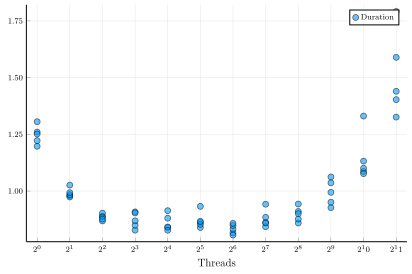

In [73]:
plot_results(results.threads,
    results.duration,
    "pi",
    "Duration",
    max_thread_power = 11)

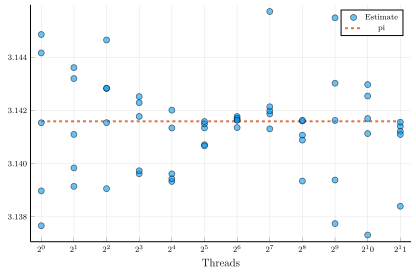

In [71]:
plot_results(results.threads,
    results.estimate,
    "pi",
    "Estimate",
    hline = [pi for i in 1:nrow(results)],
    max_thread_power = 11)

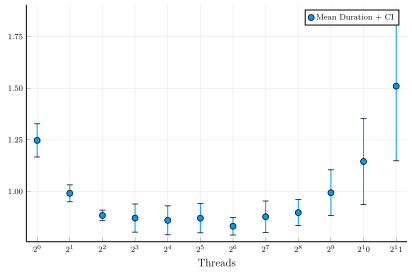

In [70]:
plot_results(parsed_results.threads,
    parsed_results.mean_duration,
    "pi",
    "Mean Duration + CI",
    yerror = parsed_results.ci_duration,
    max_thread_power = 11)

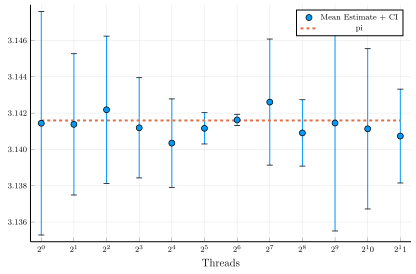

In [77]:
plot_results(parsed_results.threads,
    parsed_results.mean_estimate,
    "pi",
    "Mean Estimate + CI",
    hline = [pi for i in 1:nrow(parsed_results)],
    yerror = parsed_results.ci_estimate,
    max_thread_power = 11)